In [2]:
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageOps
from collections import Counter
import numpy as np
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import patches

fontprop = fm.FontProperties(fname='./NanumBarunGothic.ttf', size=18)

ImportError: attempted relative import with no known parent package

ModuleNotFoundError: No module named 'dataset'

In [ ]:
dataset = SceneTextDataset(data_dir_list, split='train', image_size=image_size, crop_size=input_size)

In [4]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

In [11]:
# json file 경로 설정
# data = read_json("/opt/ml/input/data/ICDAR17_Korean/ufo/train.json")
# data = read_json("/opt/ml/input/data/camper/annotation.json")
data = read_json("/opt/ml/input/data/aihub/ufo/train.json")

# image 폴더 경로 설정
# path_imgs='/opt/ml/input/data/ICDAR17_Korean/images/'
# path_imgs='/opt/ml/input/data/camper/images/'
path_imgs='/opt/ml/input/data/aihub/images/'

In [12]:
dic_image=data['images']

### 사용법
1. start, end index 설정
2. 이미지, 라벨 확인
3. 검토 필요시 y
4. 검토 불필요시 n
5. y/n 이외의 키 입력시 종료

In [13]:
start_idx=0
end_idx=100

start check 00011.jpg....
음_KO_Horizontal
악_KO_Horizontal


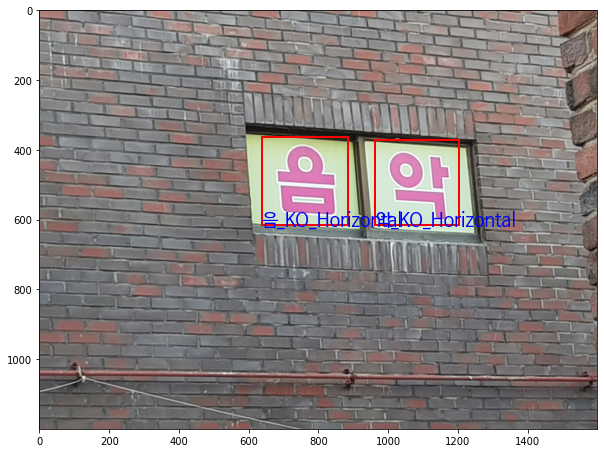

Index : 0 // 검토필요 목록 추가(y/n): n


start check 00016.JPG....
매니큐어_KO_Vertical
None_KO_Vertical


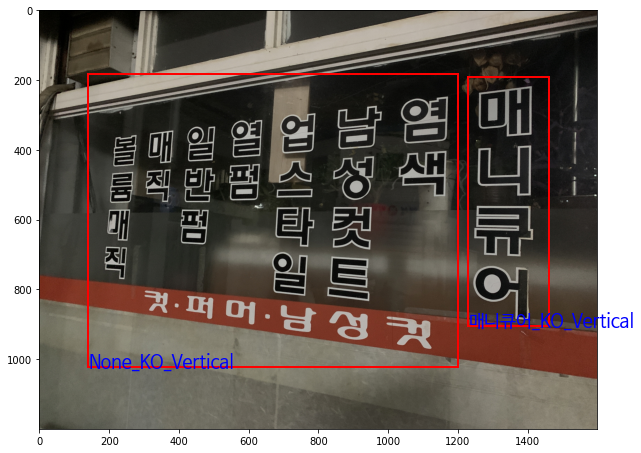

Index : 1 // 검토필요 목록 추가(y/n): n


start check 00023.jpg....
초이스_KO_Horizontal
뷰티_KO_Horizontal
None_KO_Horizontal


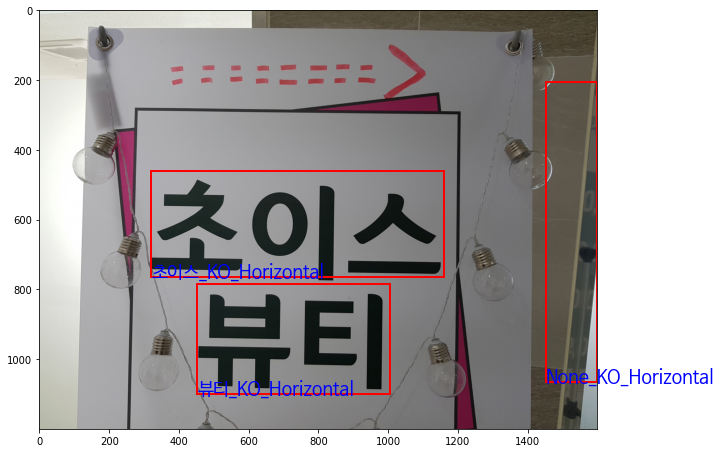

Index : 2 // 검토필요 목록 추가(y/n): n


start check 00025.jpg....
None_KO_Horizontal
None_KO_Horizontal
힘_KO_Horizontal
None_KO_Horizontal


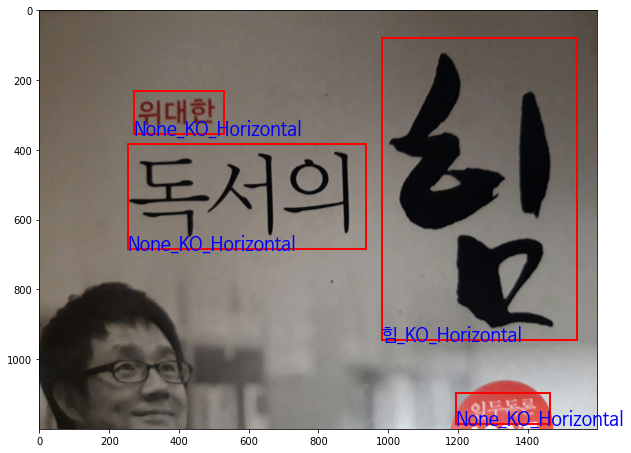

Index : 3 // 검토필요 목록 추가(y/n): n


start check 00043.jpg....
일동설렁탕_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical


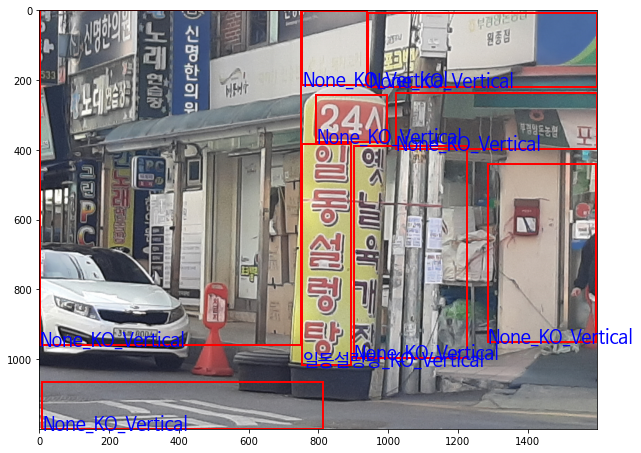

Index : 4 // 검토필요 목록 추가(y/n): n


start check 00070.jpg....
구미_KO_Vertical
동_KO_Vertical
행정복지센터_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical
None_KO_Vertical


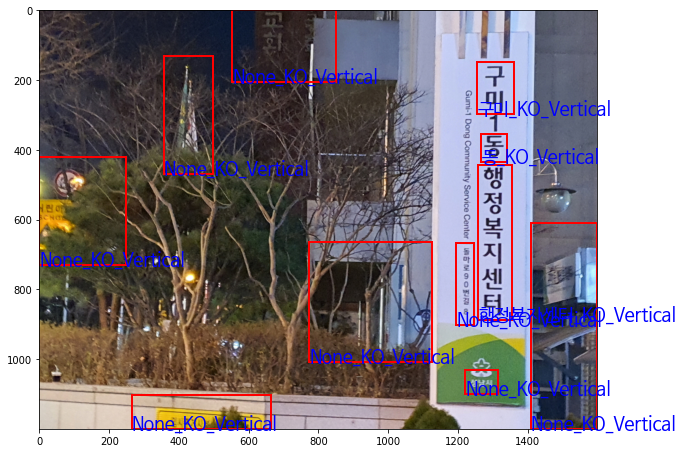

Index : 5 // 검토필요 목록 추가(y/n): n


start check 00092.jpg....
가족사진_KO_Horizontal
None_KO_Horizontal
None_KO_Horizontal


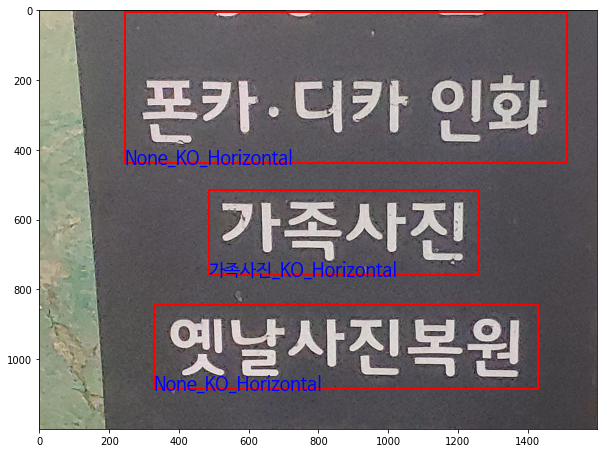

Index : 6 // 검토필요 목록 추가(y/n): n


start check 00104.jpg....
아플수_KO_Horizontal
None_KO_Horizontal
더_KO_Horizontal
가까이_KO_Horizontal


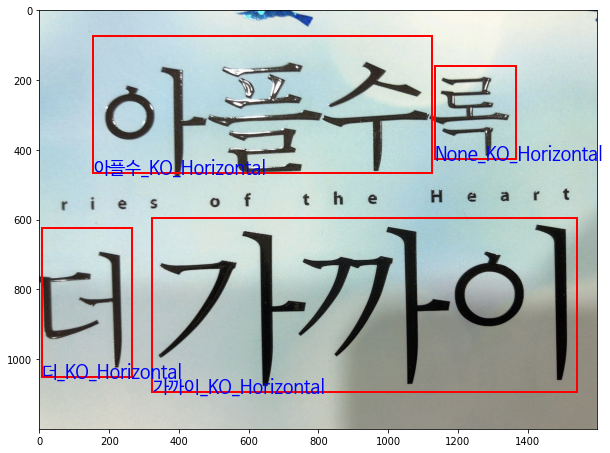

Index : 7 // 검토필요 목록 추가(y/n): n


start check 00130.jpg....
물의_KO_Horizontal
연인들_KO_Horizontal
김선우_KO_Horizontal
None_KO_Horizontal


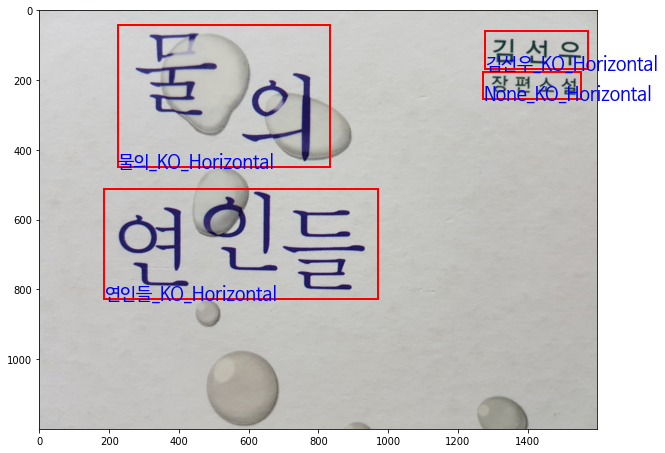

Index : 8 // 검토필요 목록 추가(y/n): n


start check 00132.jpg....
포장배달_KO_Horizontal
None_KO_Horizontal


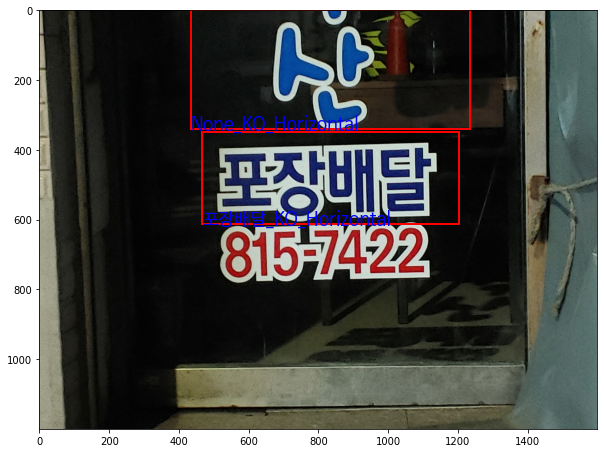

Index : 9 // 검토필요 목록 추가(y/n): n


start check 00140.jpg....
None_KO_Horizontal
입점지원센터_KO_Horizontal
None_KO_Horizontal


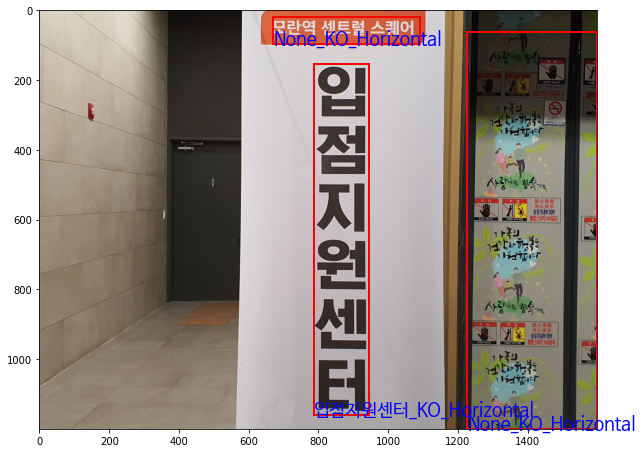

In [ ]:
check_list=[]
list_img=list(dic_image.keys())

for idx, path_img in enumerate(list_img[start_idx:end_idx]):
    print(f'start check {path_img}....')
    # command = input("continue?(y/n):")
    # if command == 'n':
    #     break
    img=Image.open(f"{path_imgs}{path_img}")
    img = ImageOps.exif_transpose(img)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img)


    for i in dic_image[path_img]['words']:
        dic_img=dic_image[path_img]['words'][i]
        ax.add_patch(
            patches.Polygon(
                dic_img['points'],
                fill=False,
                color='r',
                linewidth=2
            ),
        )
        if dic_img['language'] == None:
            img_lang="None"
        else:
            img_lang = dic_img['language'][-1]
            
        if dic_img['transcription'] == None:
            img_trans="None"
        else:
            img_trans = dic_img['transcription']
            
        dix_img_text=img_trans+'_'+img_lang+'_'+dic_img['orientation']
        print(dix_img_text)
        ax.text(dic_img['points'][0][0],
                dic_img['points'][0][1],
                dix_img_text,
                fontproperties=fontprop,
                color='b',)
    plt.show()
    
    isCorrect = input(f"Index : {start_idx + idx} // 검토필요 목록 추가(y/n):")
    if isCorrect == 'y':
        check_list.append(path_img)
        print("check list 추가")
        continue
    elif isCorrect == 'n':
        continue
    else:
        break
print("="*30)

print("Stop Check")

In [19]:
list_img[114]

'20210918_202349.jpg'

start check 20210918_224054.jpg....
C∧F≡25_Others_Horizontal
지에스25_Others_Horizontal
종로안국점_KO_Horizontal
공무원_KO_Horizontal
복지카드_KO_Horizontal
welfare_EN_Horizontal
lub_EN_Horizontal
상생 국민 지원금_KO_Horizontal
Lifestyle_EN_Horizontal
Platform_EN_Horizontal
GS25_Others_Horizontal
Lifestyle_Others_Horizontal
Platform_Others_Horizontal
GS25_Others_Horizontal
브레이브걸스_술버릇(운전만해 그후)_Others_Horizontal
사랑했어요_KO_Horizontal
배_KO_Horizontal
/_Others_Horizontal
상품권_KO_Horizontal
결제_KO_Horizontal
불가_KO_Horizontal
WELFARE_EN_Horizontal
CL_EN_Horizontal
ORANGEON_EN_Horizontal
VISA_EN_Horizontal
복지_KO_Horizontal
포인트를_KO_Horizontal
현금처럼_KO_Horizontal
100%_KO_Horizontal
2_Others_Horizontal
용_KO_Horizontal
사용 가느_KO_Horizontal
지역화폐_KO_Horizontal
(제로페이/코_KO_Horizontal
GS25에서_KO_Horizontal
사용가능_KO_Horizontal
갓생기획_KO_Horizontal
노티디_KO_Horizontal
않을거에요_KO_Horizontal
출시_KO_Horizontal
POP_EN_Horizontal
THE_EN_Horizontal
통합멤버십_KO_Horizontal
리테일_KO_Horizontal
GS_EN_Horizontal
C∧F≡_Others_Horizontal
25_Others_Horizontal

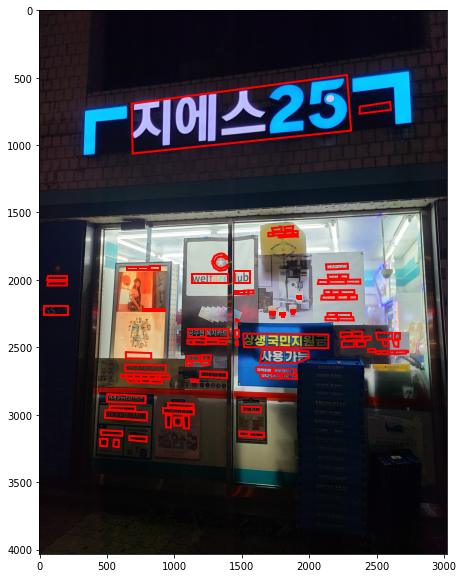

Index : 1228 // 검토필요 목록 추가(y/n): asdf


Stop Check


In [27]:
check_list=[]
list_img=list(dic_image.keys())
# list_img=['IMG_1630.jpeg',
# 'IMG_4874.jpg',
# 'IMG_5426.jpeg',
# 'IMG_7488.jpeg',
# 'IMG_7514.jpeg']
# for idx, path_img in enumerate(list_img[120:234]):
for idx, path_img in enumerate(['20210918_224054.jpg','20210918_140607.jpg']):
    print(f'start check {path_img}....')
    # command = input("continue?(y/n):")
    # if command == 'n':
    #     break
    img=Image.open(f"{path_imgs}{path_img}")
    img = ImageOps.exif_transpose(img)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img)


    for i in dic_image[path_img]['words']:
        dic_img=dic_image[path_img]['words'][i]
        ax.add_patch(
            patches.Polygon(
                dic_img['points'],
                fill=False,
                color='r',
                linewidth=2
            ),
        )
        if dic_img['language'] == None:
            img_trans="None"
        else:
            img_lang = dic_img['language'][-1]
            
        dix_img_text=dic_img['transcription']+'_'+img_lang+'_'+dic_img['orientation']
        print(dix_img_text)
        # ax.text(dic_img['points'][0][0],
        #         dic_img['points'][0][1],
        #         dix_img_text,
        #         fontproperties=fontprop,
        #         color='b',)
    plt.show()
    
    isCorrect = input(f"Index : {start_idx + idx} // 검토필요 목록 추가(y/n):")
    if isCorrect == 'y':
        check_list.append(path_img)
        print("check list 추가")
        continue
    elif isCorrect == 'n':
        continue
    else:
        break
print("="*30)

print("Stop Check")